# Load the datset

In [32]:
import pandas as pd
data=pd.read_csv('/content/Electric_cars_dataset(1).csv')

#Import the necesaary libraries

In [60]:
from sklearn.svm import SVC, LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 3. For splitting data
from sklearn.model_selection import train_test_split

# 4. For scaling features (very important for SVM)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
# 5. For evaluating performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# 1. Import libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

##EDA(EXPLATORY DATA ANALYSIS)

In [34]:
data.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [35]:
data.tail()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
64348,EV6357,KNDCE3LG7L,King,SEATTLE,WA,98144.0,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,156575107,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,WA,98402.0,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,27.0,211048701,POINT (-122.443211 47.252172),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.3
64350,EV27852,1G1FX6S05J,King,SEATTLE,WA,98119.0,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,135543411,POINT (-122.367721 47.639264),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,EV830,WP1AE2A24H,King,SEATTLE,WA,98115.0,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,46.0,192459907,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.7
64352,EV11120,1N4BZ1CP8K,Lewis,TOLEDO,WA,98591.0,2019.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,20.0,477551595,POINT (-122.800917 46.444012),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,35


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [37]:
data.describe(include='all')

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
count,64353,64353,64349,64344,64342,64347.000000,64346.000000,64349,64340,64353,64353,64353.000000,64353.000000,64184.000000,6.435300e+04,63843,63631,64353
unique,64353,5644,139,544,38,NaN,NaN,34,107,2,3,NaN,NaN,NaN,NaN,668,68,210
top,EV11120,5YJYGDEE9M,King,SEATTLE,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.122018 47.678465),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),69
freq,1,340,33552,11887,64168,NaN,NaN,27903,13138,47869,39948,NaN,NaN,NaN,NaN,1712,22555,4816
mean,NaN,NaN,NaN,NaN,NaN,98143.452888,2018.186212,NaN,NaN,NaN,NaN,106.948985,2524.990754,29.951904,1.972905e+08,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2856.064329,2.726742,NaN,NaN,NaN,NaN,104.093919,12402.895104,14.661124,1.069466e+08,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,745.000000,1993.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.385000e+03,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,14.000000,0.000000,19.000000,1.372865e+08,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,98121.000000,2018.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,34.000000,1.753776e+08,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,98370.000000,2021.000000,NaN,NaN,NaN,NaN,215.000000,0.000000,43.000000,2.299039e+08,NaN,NaN,NaN


#Handle missing value

In [38]:
data.isnull().sum()

,0
ID,0
VIN (1-10),0
County,4
City,9
State,11
ZIP Code,6
Model Year,7
Make,4
Model,13
Electric Vehicle Type,0


| **Column**             | **Missing Count** | **Type**    | **Suggested Handling**                             |
| ---------------------- | ----------------- | ----------- | -------------------------------------------------- |
| `County`               | 4                 | Categorical | Fill with most frequent                            |
| `City`                 | 9                 | Categorical | Fill with most frequent                            |
| `State`                | 11                | Categorical | Fill with most frequent                            |
| `ZIP Code`             | 6                 | Numerical   | Fill with mode (most common) or drop               |
| `Model Year`           | 7                 | Numerical   | Fill with median or mode                           |
| `Make`                 | 4                 | Categorical | Fill with most frequent                            |
| `Model`                | 13                | Categorical | Fill with most frequent                            |
| `Legislative District` | 169               | Numerical   | Fill with median or mode, or drop if not important |
| `Vehicle Location`     | 510               | Location    | ⚠️ High — consider dropping this column            |
| `Electric Utility`     | 722               | Categorical | ⚠️ High — consider dropping this column            |


Solviing the missibg values

In [39]:
# Fill categorical with mode
for col in ['County', 'City', 'State', 'Make', 'Model']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill numeric with median
data['Model Year'] = data['Model Year'].fillna(data['Model Year'].median())
data['ZIP Code'] = data['ZIP Code'].fillna(data['ZIP Code'].mode()[0])
data['Legislative District'] = data['Legislative District'].fillna(data['Legislative District'].median())

# Drop columns with too many missing values
data = data.drop(columns=['Vehicle Location', 'Electric Utility'])

##Duplicates

In [40]:
data.duplicated().sum()

np.int64(0)

#Handling outliers if they exist

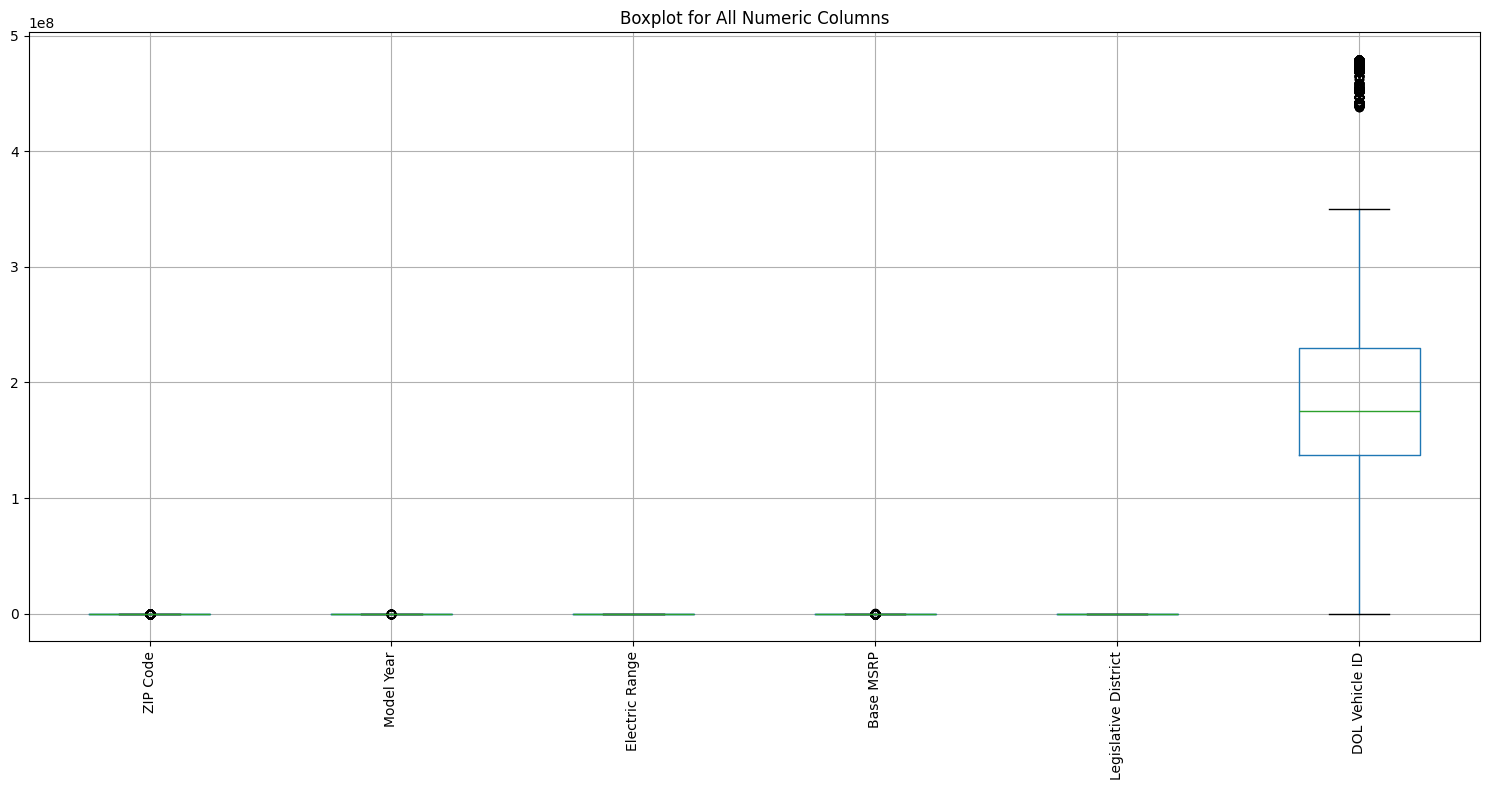

In [41]:
# Visualize the outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Set figure size
plt.figure(figsize=(15, 8))

# Plot boxplots
data[numeric_cols].boxplot(rot=90)
plt.title('Boxplot for All Numeric Columns')
plt.tight_layout()
plt.show()

In [42]:
data['Expected Price ($1k)'] = pd.to_numeric(data['Expected Price ($1k)'], errors='coerce')
outliers = detect_outliers_iqr(data, 'Expected Price ($1k)')
print(outliers)

            ID  VIN (1-10)     County            City State  ZIP Code  \
112    EV27432  WA1LAAGE7N       King        BELLEVUE    WA   98004.0   
157    EV21809  5YJSA1E24M       King        ISSAQUAH    WA   98029.0   
211    EV68984  5YJSA1E59M     Pierce          TACOMA    WA   98422.0   
386     EV5317  5YJSA1E62M  Snohomish         BOTHELL    WA   98012.0   
452    EV70318  5YJSA1E61M     Pierce         BUCKLEY    WA   98321.0   
...        ...         ...        ...             ...   ...       ...   
63292  EV90039  5YJSA1E57M       King         REDMOND    WA   98052.0   
63377  EV43521  5YJSA1E62M      Clark      RIDGEFIELD    WA   98642.0   
63707  EV26405  5YJSA1E51M       King         SEATTLE    WA   98115.0   
63984  EV36569  5YJSA1E52M    Spokane  SPOKANE VALLEY    WA   99212.0   
64156  EV14197  5YJSA1E50M       King   MERCER ISLAND    WA   98040.0   

       Model Year   Make    Model           Electric Vehicle Type  \
112        2022.0   AUDI   E-TRON  Battery Electric Ve

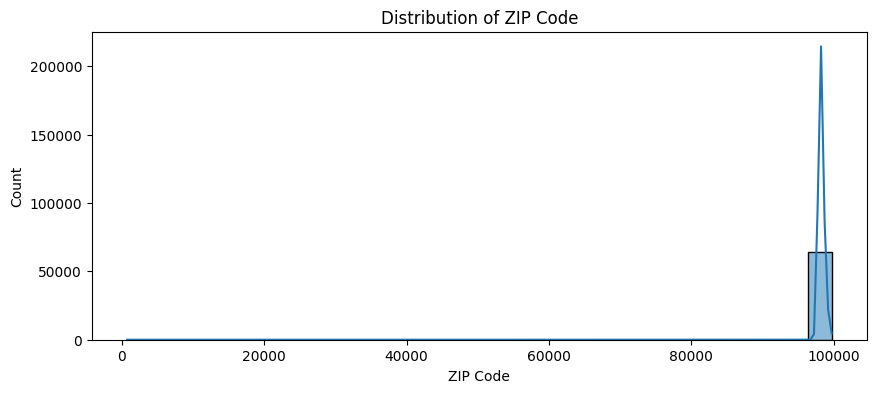

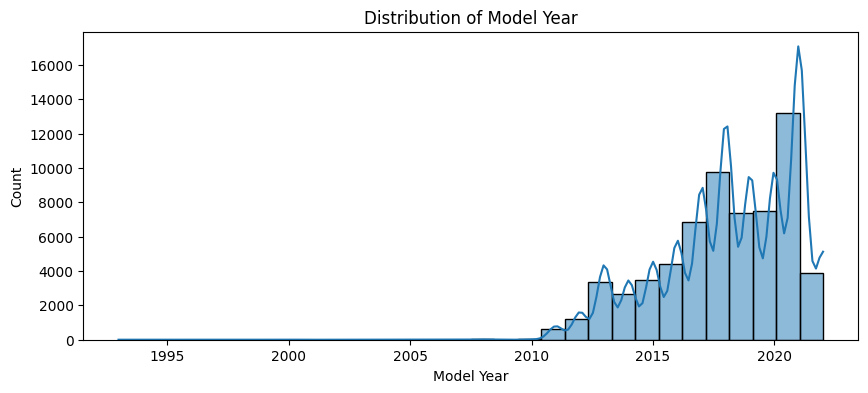

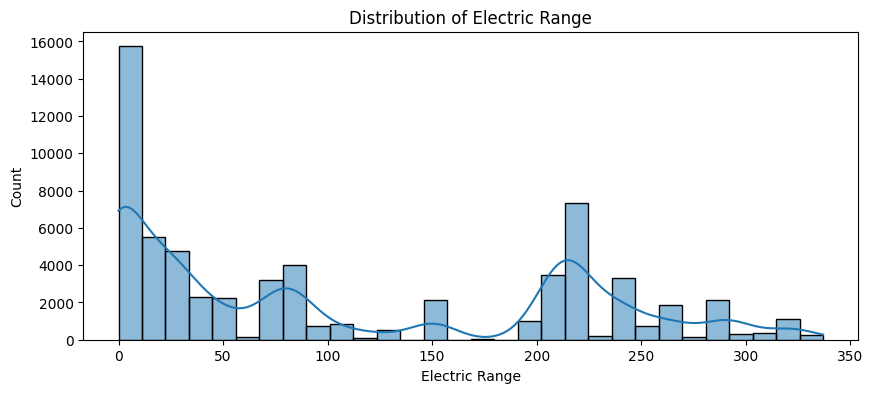

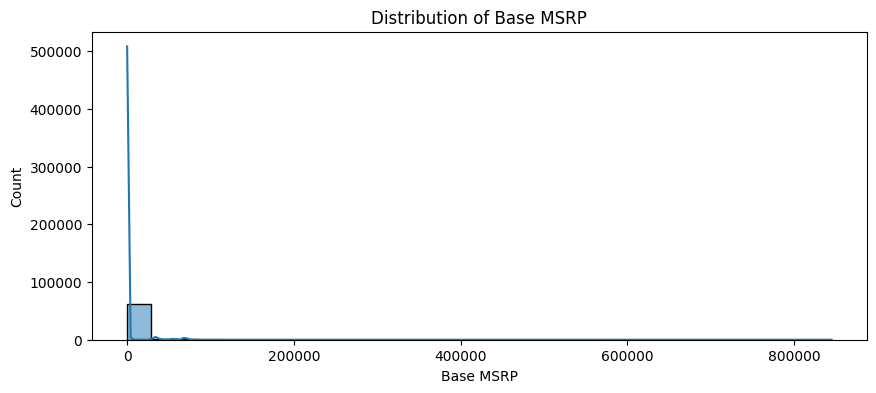

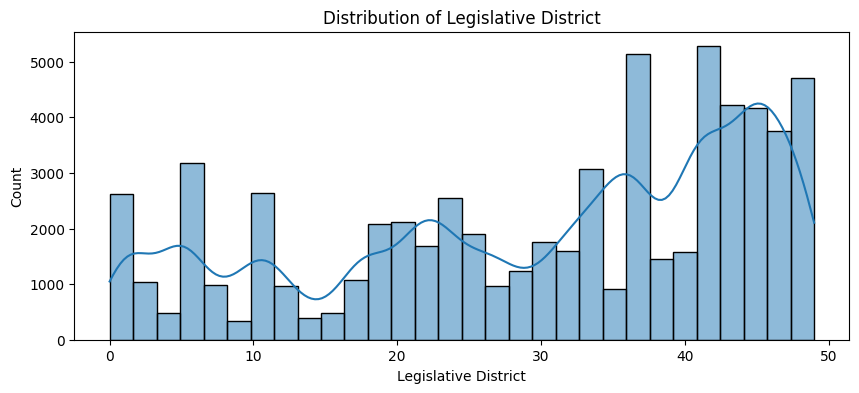

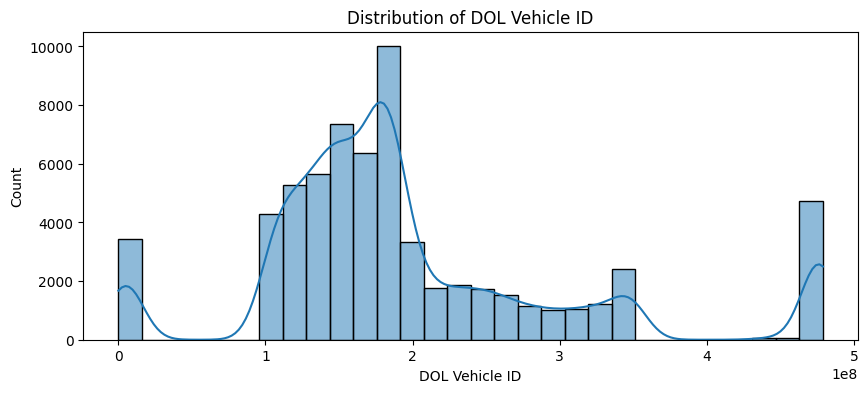

In [43]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


##ENCODING

In [46]:
columns_to_drop = [
    'ID',
    'VIN (1-10)',
    'DOL Vehicle ID',
    'City'  # optional
]

data = data.drop(columns=columns_to_drop)

#Identify the catgorical data

In [47]:
# Identify all object (categorical) columns
cat_cols = data.select_dtypes(include='object').columns
print("Categorical columns:\n", cat_cols)


Categorical columns:
 Index(['County', 'State', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility'],
      dtype='object')


#Encoding using the label encoder

In [48]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Encode each categorical column
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

#Print the data

In [49]:
data.head()

,County,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Expected Price ($1k)
0,120,35,98037.0,2020.0,28,57,0,0,308,0,32.0,50.00
1,118,35,98229.0,2011.0,22,53,0,0,73,0,40.0,15.00
2,95,35,98422.0,2015.0,3,45,0,0,81,0,27.0,18.00
3,60,35,98053.0,2013.0,5,96,1,0,38,0,45.0,33.90
4,95,35,98375.0,2019.0,5,15,0,0,238,0,25.0,41.78


In [50]:
data.columns

Index(['County', 'State', 'ZIP Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Expected Price ($1k)'],
      dtype='object')

In [51]:
#print the overview
data[cat_cols].head()

,County,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,120,35,28,57,0,0
1,118,35,22,53,0,0
2,95,35,3,45,0,0
3,60,35,5,96,1,0
4,95,35,5,15,0,0


## 2. SELECT TARGET VARIABLE AND THE FEATURES

Target variable

In [52]:
#the targer willl beExpected Price ($1k)
target = 'Expected Price ($1k)'

Feature columns

In [53]:
features = [
    'County',
    'State',
    'ZIP Code',
    'Model Year',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Range',
    'Base MSRP'
]


In [54]:
X = data[features]   # Features
y = data[target]     # Target


##3.SPLLIT YOUR DATSET TO TRAINING YOUR DATASET AND TRAIN TEST IT

In [55]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% test, 80% train
    random_state=42       # For reproducibility
)

## 4. BUILD AND TRAIN THE SVM MODEL

In [61]:
# Replace invalid missing value patterns with np.nan
X.replace(['N/', 'n/a', 'N/A', '', ' '], np.nan, inplace=True)

In [62]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
#Train the SVM model
from sklearn.svm import SVR

# Initialize the model
svm_model = SVR(kernel='rbf')  # You can also try 'linear', 'poly'

# Train the model
svm_model.fit(X_train_scaled, y_train)

SVR()

#Access the model

In [65]:
import numpy as np

# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Model Evaluation Results:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

Model Evaluation Results:
MAE  = 5.51
MSE  = 214.48
RMSE = 14.65
R²   = 0.67


In [58]:
print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in y_test:", y_test.isnull().sum())

Missing values in y_train: 9
Missing values in y_test: 4


In [66]:
print(X_train.dtypes)

County                                                 int64
State                                                  int64
ZIP Code                                             float64
Model Year                                           float64
Make                                                   int64
Model                                                  int64
Electric Vehicle Type                                  int64
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int64
Electric Range                                         int64
Base MSRP                                              int64
dtype: object
